## Data Mining Project Notebook

## by Keshav Raj Singh Rathore

## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. 

They collected a sample that summarizes the activities of users during the past few months. 

You are given the task to identify the segments based on credit card usage.

## Data Dictionary for Market Segmentation:

- spending: Amount spent by the customer per month (in 1000s)

- advance_payments: Amount paid by the customer in advance by cash (in 100s)

- probability_of_full_payment: Probability of payment done in full by the customer to the bank

- current_balance: Balance amount left in the account to make purchases (in 1000s)

- credit_limit: Limit of the amount in credit card (10000s)

- min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

- max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
# output is displayed in this juptyer notebook (inline dislay)
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB & data visulization
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import copy #contains functions that are used to copy objects
import warnings # is actually a subclass of Exception
warnings.filterwarnings('ignore') #ignore this warning

#Clustering Libraries
from sklearn.cluster import KMeans #You can see that the class is imported in the following script
from sklearn.cluster import AffinityPropagation # Helps in perform Affinity Propagation clustering
from sklearn.cluster import AgglomerativeClustering # It is used for importing the class from the cluster
from sklearn.cluster import Birch # complement other clustering algorithms by creating a summary of the dataset that the other clustering algorithm can use
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score # This function returns the mean Silhouette Coefficient over all samples
import scipy.cluster.hierarchy as shc #  It can be used to flatten the dendrogram
from scipy.cluster.hierarchy import dendrogram #  illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children
import scipy.stats as stat #All of the statistics functions are located in the sub-package scipy.stats

from tqdm.auto import tqdm
from   scipy.stats import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm

## Referance Goggle 

import missingno as msno
import pylab
import math
import os #  import os Executing a shell command os.system() Get the users environment os.environ() #Returns the current working directory. os.getcwd() Return the real group id 

## Load the data

In [2]:
df= pd.read_csv('bank_marketing_part1_Data.csv')

## Q1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
print('Head is used to return top row in data set')
df.head(5)

Head is used to return top row in data set


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
print('Tail is used to return last row in data set')
df.tail(5)

Tail is used to return last row in data set


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


Observation

Data looks good based on intial records seen in top 5 and bottom 5.

## Summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
df.shape

(210, 7)

## EDA

We are going to start exploring our data with the Univariate analysis (each feature individually), before carrying the Bivariate analysis and compare pairs of features to find correlation between them.

## Univariate analysis

In [8]:
print('Descriptive Statastics of our Data:')
df.describe(include='all').T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


## Detecting the outliers using Box_Plot

<AxesSubplot:>

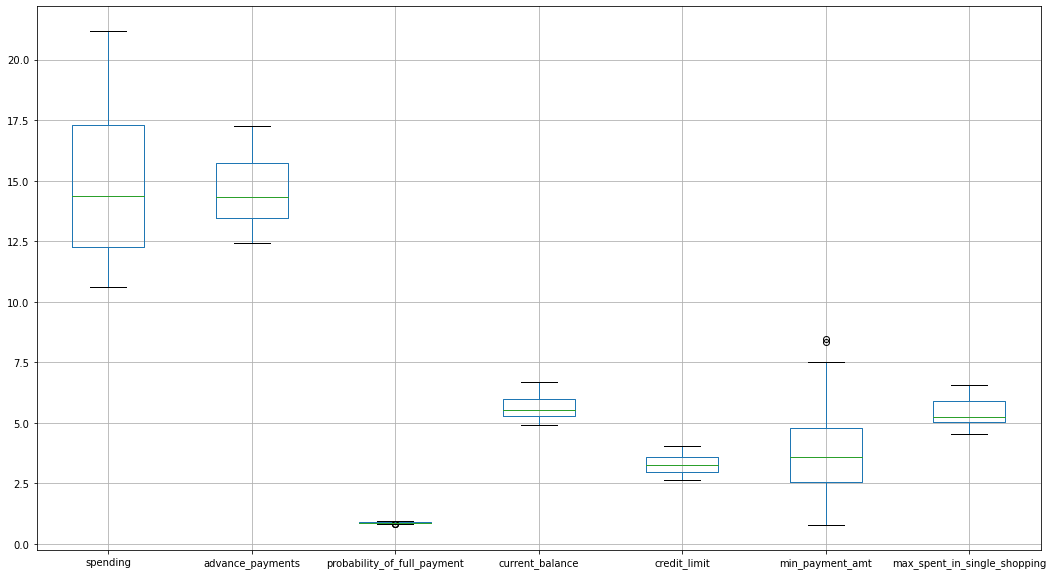

In [9]:
df.boxplot(figsize=(18,10))

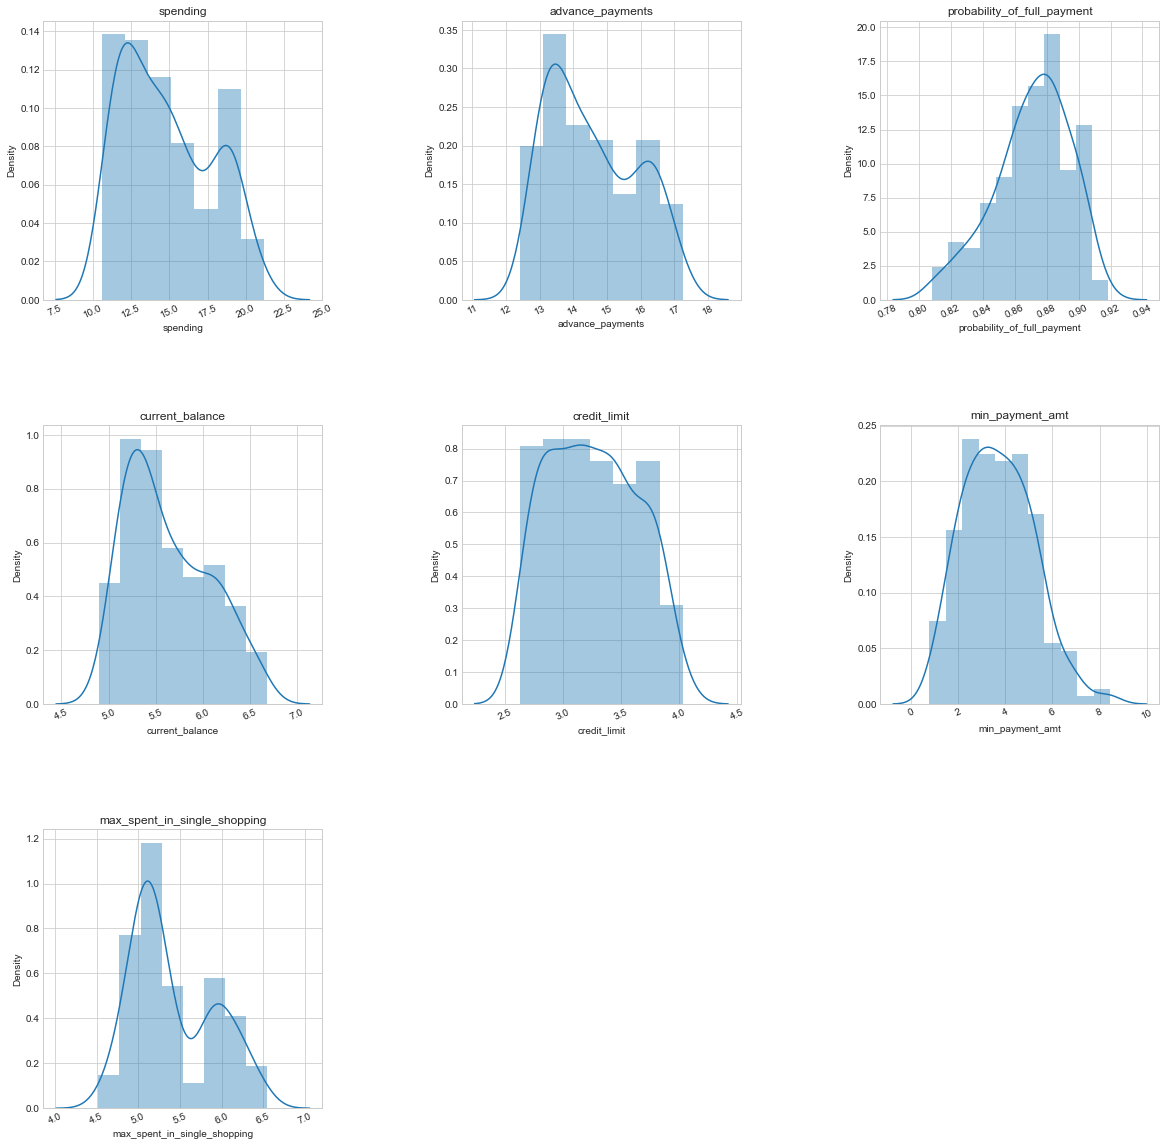

In [10]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [11]:
# Method 1
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


## Remove the Outliers using Interquartile Range (IQR)

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
lratio,uratio=remove_outlier(df_scaled['spending'])
df_scaled['spending']=np.where(df_scaled['spending']>uratio,uratio,df_scaled['spending'])
df_scaled['spending']=np.where(df_scaled['spending']<lratio,lratio,df_scaled['spending'])

lratio,uratio=remove_outlier(df_scaled['advance_payments'])
df_scaled['advance_payments']=np.where(df_scaled['advance_payments']>uratio,uratio,df_scaled['advance_payments'])
df_scaled['advance_payments']=np.where(df_scaled['advance_payments']<lratio,lratio,df_scaled['advance_payments'])

lratio,uratio=remove_outlier(df_scaled['probability_of_full_payment'])
df_scaled['probability_of_full_payment']=np.where(df_scaled['probability_of_full_payment']>uratio,uratio,df_scaled['probability_of_full_payment'])
df_scaled['probability_of_full_payment']=np.where(df_scaled['probability_of_full_payment']<lratio,lratio,df_scaled['probability_of_full_payment'])

lratio,uratio=remove_outlier(df_scaled['current_balance'])
df_scaled['current_balance']=np.where(df_scaled['current_balance']>uratio,uratio,df_scaled['current_balance'])
df_scaled['current_balance']=np.where(df_scaled['current_balance']<lratio,lratio,df_scaled['current_balance'])

lratio,uratio=remove_outlier(df_scaled['credit_limit'])
df_scaled['credit_limit']=np.where(df_scaled['credit_limit']>uratio,uratio,df_scaled['credit_limit'])
df_scaled['credit_limit']=np.where(df_scaled['credit_limit']<lratio,lratio,df_scaled['credit_limit'])

lratio,uratio=remove_outlier(df_scaled['min_payment_amt'])
df_scaled['min_payment_amt']=np.where(df_scaled['min_payment_amt']>uratio,uratio,df_scaled['min_payment_amt'])
df_scaled['min_payment_amt']=np.where(df_scaled['min_payment_amt']<lratio,lratio,df_scaled['min_payment_amt'])

lratio,uratio=remove_outlier(df_scaled['max_spent_in_single_shopping'])
df_scaled['max_spent_in_single_shopping']=np.where(df_scaled['max_spent_in_single_shopping']>uratio,uratio,df_scaled['max_spent_in_single_shopping'])
df_scaled['max_spent_in_single_shopping']=np.where(df_scaled['max_spent_in_single_shopping']<lratio,lratio,df_scaled['max_spent_in_single_shopping'])

## DATA after Scaling and removing of Outliers

<AxesSubplot:>

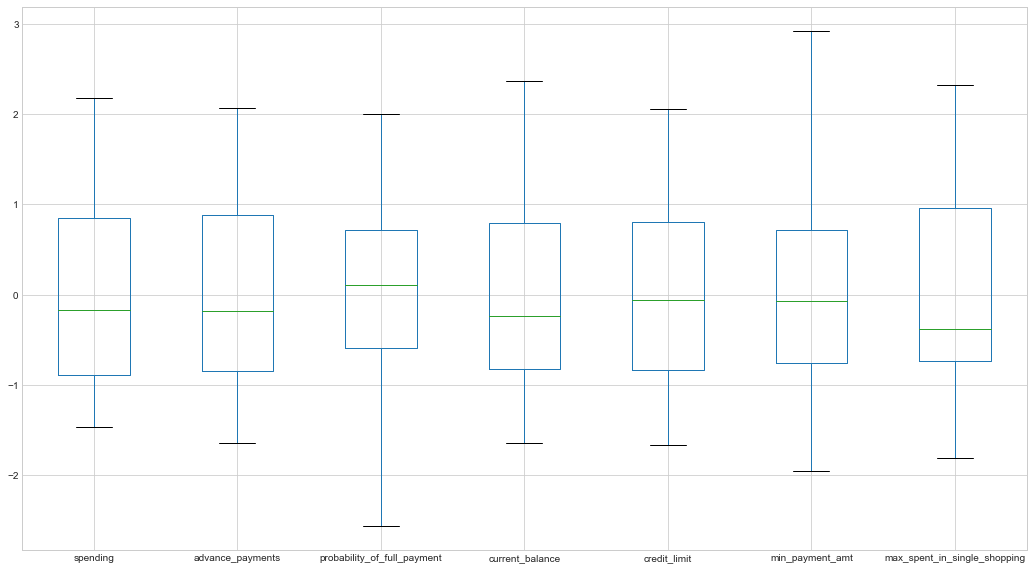

In [14]:
df_scaled.boxplot(figsize=(18,10))

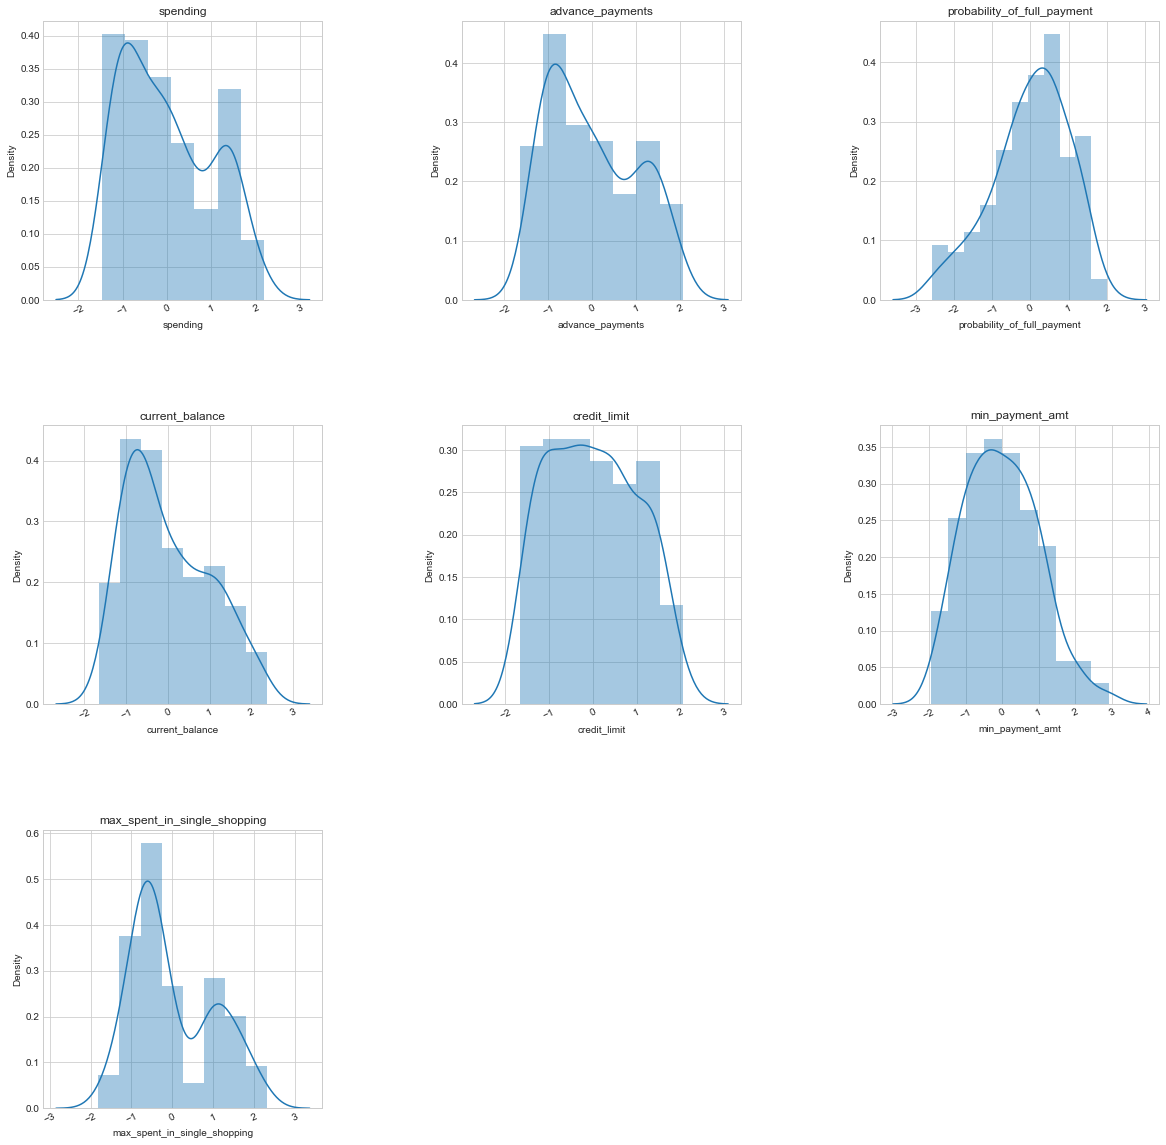

In [15]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df_scaled.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df_scaled[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

## Kindly Note:- For the Below calculation we are using original dataset and not the Scaled one

## spending: Amount spent by the customer per month (in 1000s)

In [16]:
import scipy.stats as stats

In [17]:
print('Range of values: ', df['spending'].max()-df['spending'].min())

Range of values:  10.59


In [18]:
#Central values 
print('Minimum spending:',df['spending'].min())
print('Maximum spending:',df['spending'].max())
print('Mean value:', df['spending'].mean())
print('Median value:',df['spending'].median())
print('Standard deviation:', df['spending'].std())
print('Null values:',df['spending'].isnull().any())

Minimum spending: 10.59
Maximum spending: 21.18
Mean value: 14.847523809523818
Median value: 14.355
Standard deviation: 2.909699430687361
Null values: False


In [19]:
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ',stats.iqr(df['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3rd Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


## Advance_payments: Amount paid by the customer in advance by cash (in 100s)

In [20]:
print('Range of values: ', df['advance_payments'].max()-df['advance_payments'].min())

Range of values:  4.84


In [21]:
#Central values 
print('Minimum advance_payments',df['advance_payments'].min())

print('Maximum advance_payments:',df['advance_payments'].max())

print('Mean value:',df['advance_payments'].mean())

print('Median value:',df['advance_payments'].median())

print('Standard deviation:',df['advance_payments'].std())

print('Null values:',df['advance_payments'].isnull().any())

Minimum advance_payments 12.41
Maximum advance_payments: 17.25
Mean value: 14.559285714285727
Median value: 14.32
Standard deviation: 1.305958726564022
Null values: False


In [22]:
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(df['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3rd Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


## Probability_of_full_payment: Probability of payment done in full by the customer to the bank

In [23]:
print('Range of values: ', df['probability_of_full_payment'].max()-df['probability_of_full_payment'].min())

Range of values:  0.11019999999999996


In [24]:
#Central values 
print('Minimum probability_of_full_payment',df['probability_of_full_payment'].min())

print('Maximum probability_of_full_payment:',df['probability_of_full_payment'].max())

print('Mean value:',df['probability_of_full_payment'].mean())

print('Median value:',df['probability_of_full_payment'].median())

print('Standard deviation:',df['probability_of_full_payment'].std())

print('Null values:',df['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment 0.8081
Maximum probability_of_full_payment: 0.9183
Mean value: 0.8709985714285714
Median value: 0.8734500000000001
Standard deviation: 0.0236294165838465
Null values: False


In [25]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3rd Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


## current_balance: Balance amount left in the account to make purchases (in 1000s)

In [26]:
print('Range of values: ', df['current_balance'].max()-df['current_balance'].min())

Range of values:  1.7759999999999998


In [27]:
#Central values 
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance: ',df['current_balance'].max())
print('Mean value: ', df['current_balance'].mean())
print('Median value: ',df['current_balance'].median())
print('Standard deviation: ',df['current_balance'].std())
print('Null values: ',df['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [28]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(df['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3rd Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


## credit_limit: Limit of the amount in credit card (10000s)

In [29]:
print('Range of values: ', df['credit_limit'].max()-df['credit_limit'].min())

Range of values:  1.4030000000000005


In [30]:
#Central values 
print('Minimum current_balance: ',df['credit_limit'].min())
print('Maximum current_balance: ',df['credit_limit'].max())
print('Mean value: ', df['credit_limit'].mean())
print('Median value: ',df['credit_limit'].median())
print('Standard deviation: ', df['credit_limit'].std())
print('Null values: ',df['credit_limit'].isnull().any())

Minimum current_balance:  2.63
Maximum current_balance:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [31]:
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(df['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3rd Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


## min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

In [32]:
print('Range of values: ', df['min_payment_amt'].max()-df['min_payment_amt'].min())

Range of values:  7.690899999999999


In [33]:
#Central values 
print('Minimum current_balance: ',df['min_payment_amt'].min())
print('Maximum current_balance: ',df['min_payment_amt'].max())
print('Mean value: ', df['min_payment_amt'].mean())
print('Median value: ',df['min_payment_amt'].median())
print('Standard deviation: ', df['min_payment_amt'].std())
print('Null values: ',df['min_payment_amt'].isnull().any())

Minimum current_balance:  0.7651
Maximum current_balance:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [34]:
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(df['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3rd Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997


## max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [35]:
print('Range of values: ', df['max_spent_in_single_shopping'].max()-df['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [36]:
#Central values 
print('Minimum current_balance: ',df['max_spent_in_single_shopping'].min())
print('Maximum current_balance: ',df['max_spent_in_single_shopping'].max())
print('Mean value: ', df['max_spent_in_single_shopping'].mean())
print('Median value: ',df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', df['max_spent_in_single_shopping'].std())
print('Null values: ',df['max_spent_in_single_shopping'].isnull().any())

Minimum current_balance:  4.519
Maximum current_balance:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [37]:
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(df['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3rd Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


## Let us check the Swekness of the original data set before Scaling

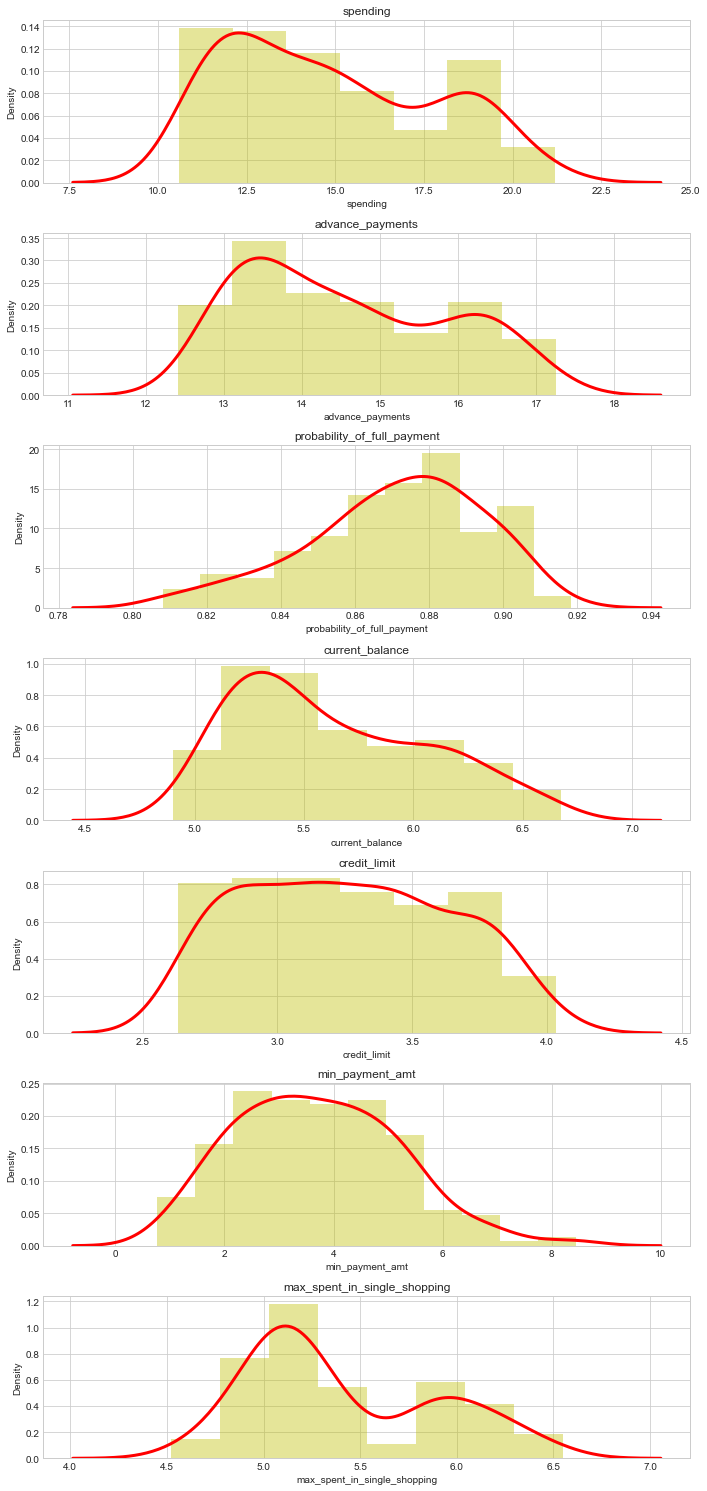

In [38]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df.columns[i])

plt.tight_layout()

In [39]:
## Let us check the Swekness of the original data set after Scaling

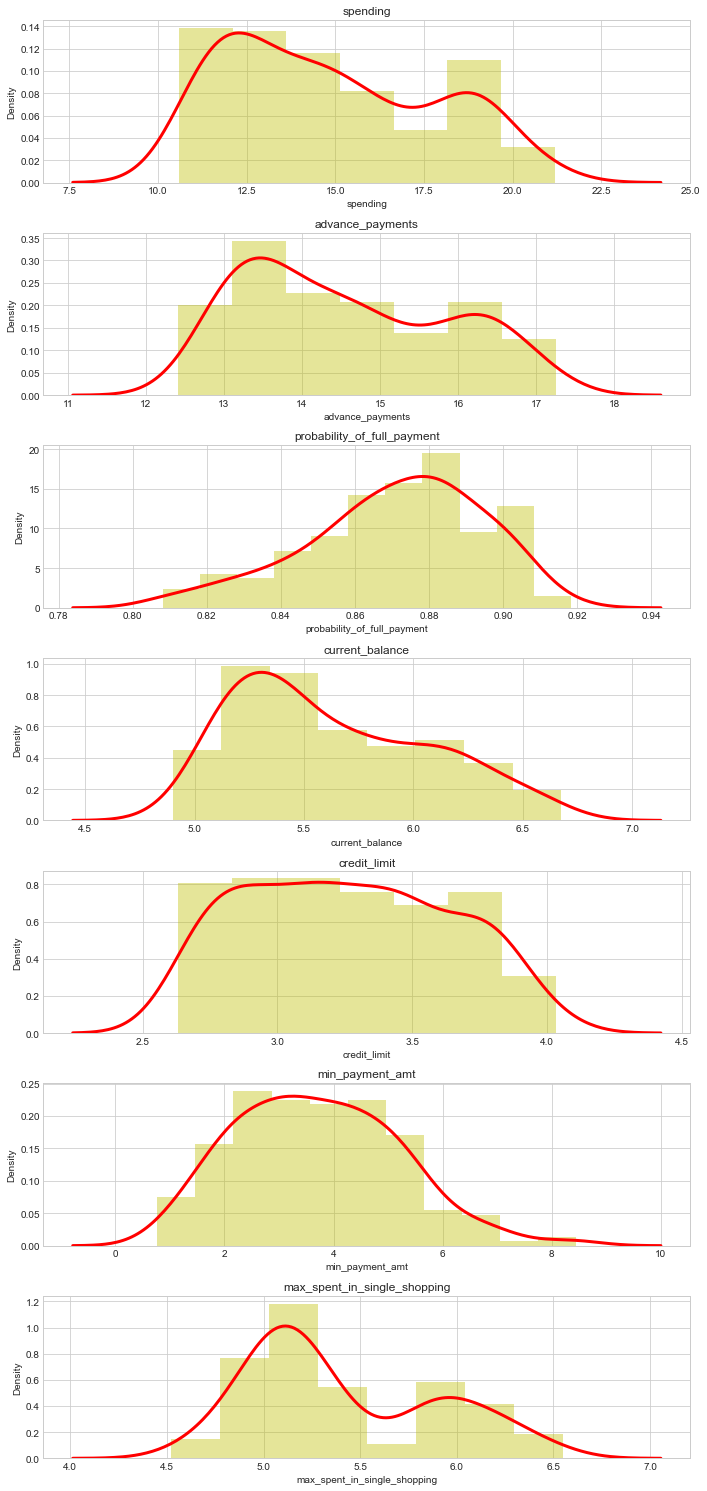

In [40]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(df_scaled.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "y"})
    plt.title(df.columns[i])

plt.tight_layout()

## Lets Try the Multivariate analysis

Creating the pairplot to pairwise relationships in a Scaled dataset

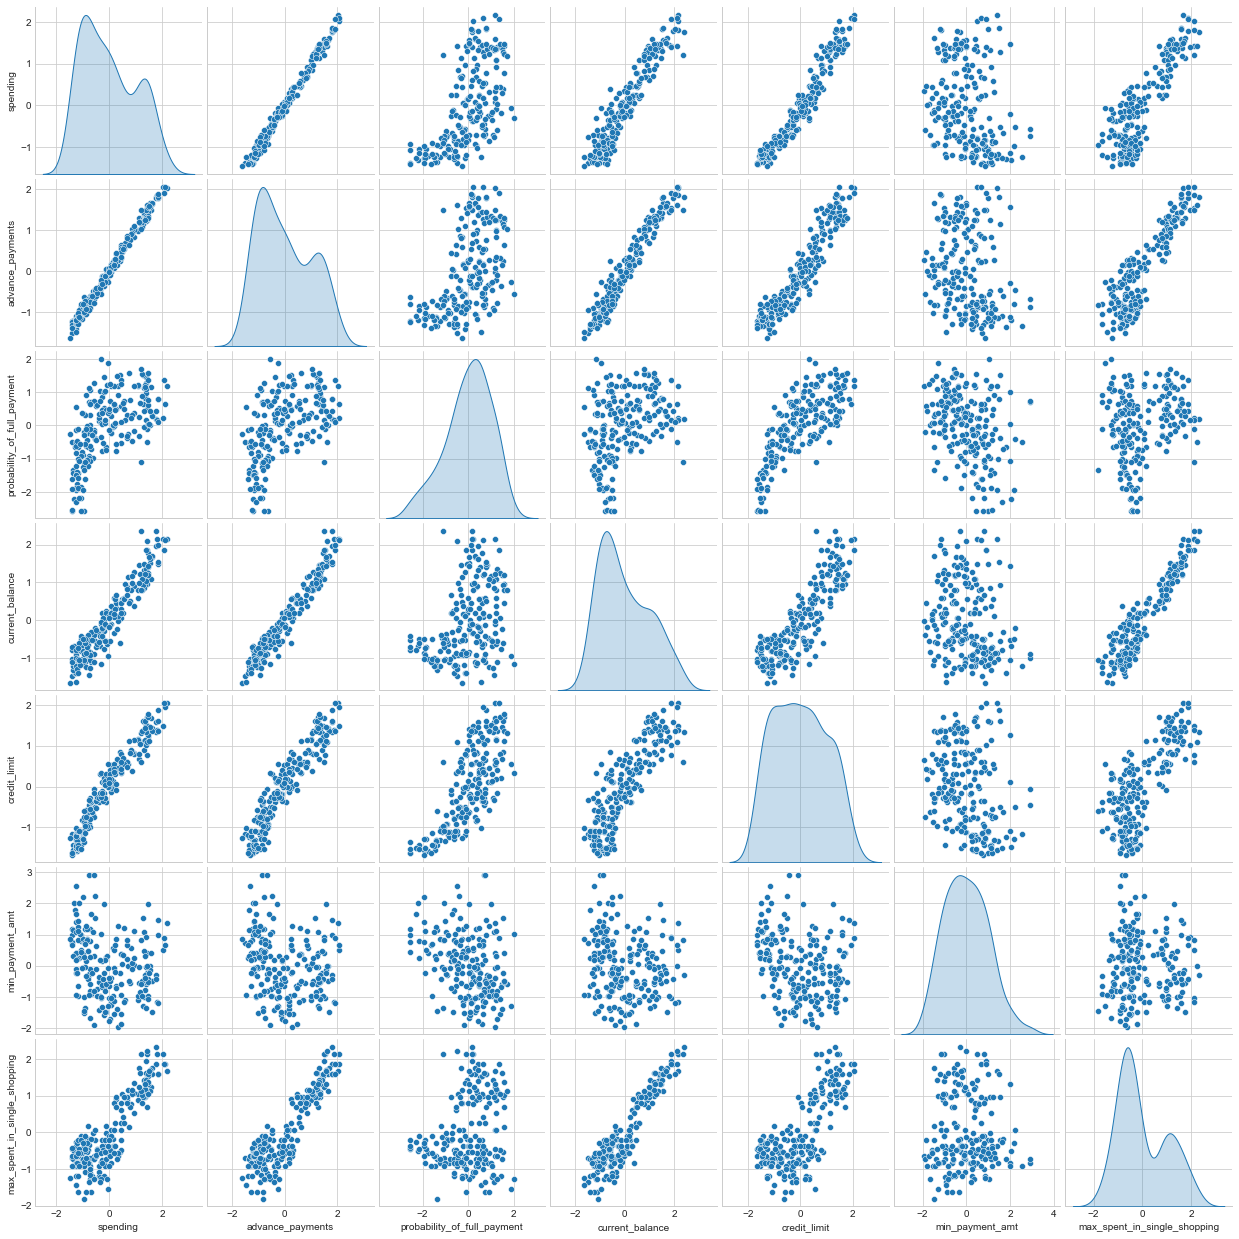

In [41]:
sns.pairplot(df_scaled,diag_kind='kde');

## Creting correlation matrix

In [42]:
df_scaled.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


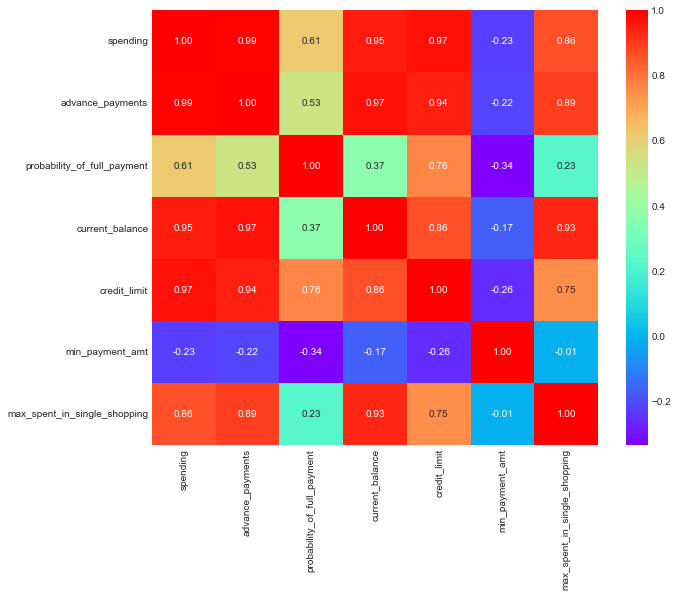

In [43]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(),annot=True,fmt=".2f",cmap='rainbow')
plt.show()

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Q1.2  Do you think scaling is necessary for clustering in this case? Justify

##  Scaling is not required again as we have done it priorly

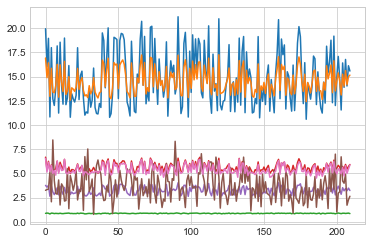

In [44]:
# prior to scaling 
plt.plot(df)
plt.show()

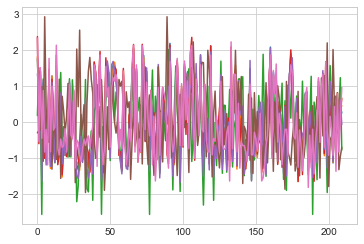

In [45]:
#after scaling
plt.plot(df_scaled)
plt.show()

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Q 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them?

## Choosing Ward linkage method

In [46]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [47]:
# linkage function using Wardlinkage Method
wardlink = linkage(df_scaled,method='ward')

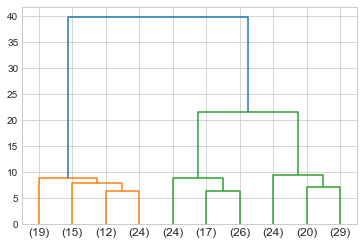

In [48]:
dend = dendrogram(wardlink,truncate_mode='lastp',p=10)

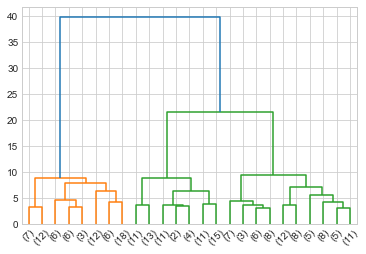

In [49]:
dend = dendrogram(wardlink,truncate_mode='lastp',p = 25)

## Importing fcluster module to create clusters

In [50]:
from scipy.cluster.hierarchy import fcluster

In [51]:
## Method 1(using maximum cluster)
cluster_1 = fcluster(wardlink,3,criterion='maxclust')
cluster_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [52]:
## Method 2(using distance cluster)
cluster_2 = fcluster(wardlink,23,criterion='distance')
cluster_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [53]:
cluster3_dataset=df.copy()

In [54]:
# Attaching max_cluster to dataset
cluster3_dataset['cluster_1']= cluster_1

In [55]:
# Attaching Distance_cluster to dataset
cluster3_dataset['cluster_2']= cluster_2

In [56]:
cluster3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_1,cluster_2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


## Wardlink Cluster Frequency

In [57]:
# Max Cluster
cluster3_dataset['cluster_1'].value_counts().sort_index()

1    70
2    67
3    73
Name: cluster_1, dtype: int64

In [58]:
# Distance Cluster
cluster3_dataset['cluster_2'].value_counts().sort_index()

1     70
2    140
Name: cluster_2, dtype: int64

## Wardlink Cluster Profiles

In [59]:
aggdata=cluster3_dataset.groupby('cluster_1').mean()
aggdata['Freq']=cluster3_dataset['cluster_1'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_2,Freq
cluster_1,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.0,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,2.0,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,2.0,73


In [60]:
aggdata=cluster3_dataset.groupby('cluster_2').mean()
aggdata['Freq']=cluster3_dataset['cluster_2'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_1,Freq
cluster_2,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.000000,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,2.521429,140


## Choosing Average linkage method

In [61]:
link_method = linkage(df_scaled, method = 'average')

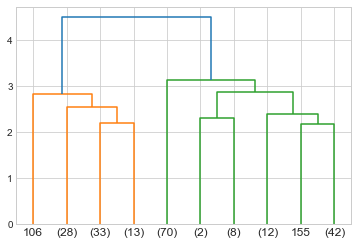

In [62]:
dend = dendrogram(link_method,truncate_mode='lastp',p = 10)

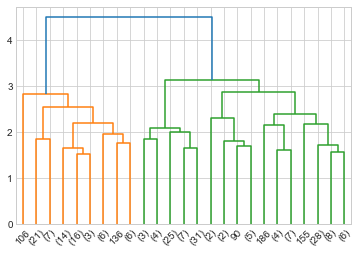

In [63]:
dend = dendrogram(link_method,truncate_mode='lastp',p = 25)

Importing fcluster module to create clusters

In [64]:
from scipy.cluster.hierarchy import fcluster

In [65]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_maxclust_1 = fcluster(link_method, 3, criterion='maxclust')
clusters_maxclust_1

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [66]:
## Method 2(using distance cluster)
clusters_distclust_2 = fcluster(wardlink,23,criterion='distance')
clusters_distclust_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [67]:
clusters_avglink_dataset = df.copy()

In [68]:
clusters_avglink_dataset['clusters_maxclust_1'] = clusters_maxclust_1

In [69]:
clusters_avglink_dataset['clusters_distclust_2'] = clusters_distclust_2

In [70]:
clusters_avglink_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_maxclust_1,clusters_distclust_2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


## AverageLink Cluster Frequency

In [71]:
# Max Cluster
clusters_avglink_dataset['clusters_maxclust_1'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters_maxclust_1, dtype: int64

In [72]:
# Distance Cluster
clusters_avglink_dataset['clusters_distclust_2'].value_counts().sort_index()

1     70
2    140
Name: clusters_distclust_2, dtype: int64

## Average link Cluster Profiles

In [73]:
aggdata_w=clusters_avglink_dataset.groupby('clusters_maxclust_1').mean()
aggdata_w['Freq']=clusters_avglink_dataset['clusters_maxclust_1'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_distclust_2,Freq
clusters_maxclust_1,,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,1.106667,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,2.000000,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,1.953846,65


In [74]:
aggdata=clusters_avglink_dataset.groupby('clusters_distclust_2').mean()
aggdata['Freq']=clusters_avglink_dataset['clusters_distclust_2'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_maxclust_1,Freq
clusters_distclust_2,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.085714,70
2,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,2.385714,140


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Q1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [75]:
from sklearn.cluster import KMeans

## No need to use scaling as we have done it previously

In [76]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_scaled)
k_means.inertia_

1466.2981569540962

In [77]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_scaled)
k_means.inertia_

655.6870659927683

In [78]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
k_means.inertia_

427.97721673953674

In [79]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
k_means.inertia_

368.78556067979645

In [80]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_scaled)
k_means.inertia_

325.300889806876

In [81]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_scaled)
k_means.inertia_

288.58892153498545

In [82]:
wss= [] 

In [83]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(df_scaled)
        wss.append(KM.inertia_)

In [84]:
wss

[1466.2981569540962,
 655.6870659927683,
 427.97721673953674,
 369.11122176906485,
 324.2329578705769,
 289.0750168532566,
 260.679028104536,
 239.00344356014455,
 221.02831924569955,
 204.85365235619565]

In [85]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)

NameError: name 'X' is not defined

In [ ]:
# plot the inertia curve
plt.figure(figsize=(15,10))
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

The red x-marker marks the elbow point. The elbow point gives the optimal number of clusters, which is three here. This makes totally sense, because the data set is created such that there are three different clusters. When adding more clusters, the Inertia value decreases, but also the information contained in a cluster decreases further.

## Ploting the information fo wss

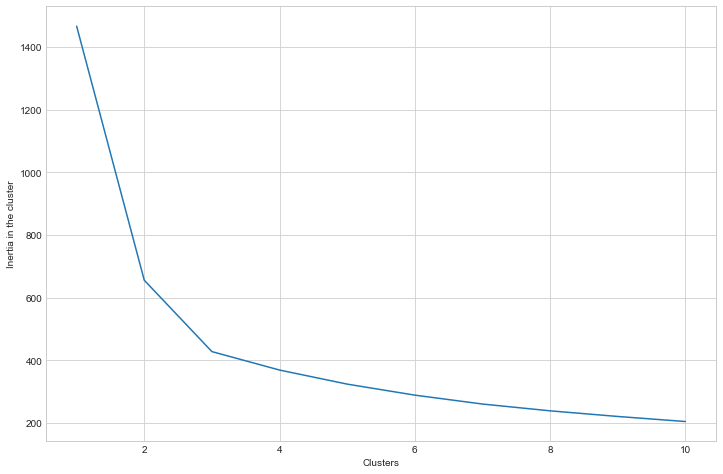

In [86]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

## Creating the variable column for K_Means cluster value in original dataset

In [87]:
k_means_1 = KMeans(n_clusters = 4)
k_means_1.fit(df_scaled)
labels_1 = k_means_1.labels_

In [88]:
kmeans1_dataset=df.copy()

In [89]:
kmeans1_dataset['k_means_1']=k_means

In [90]:
kmeans1_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_means_1
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,KMeans(n_clusters=6)
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,KMeans(n_clusters=6)
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,KMeans(n_clusters=6)
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,KMeans(n_clusters=6)
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,KMeans(n_clusters=6)


## Silhoutte Score Function

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [92]:
silhouette_score(df_scaled,labels_1)

0.3278371735847444

In [93]:
from sklearn import metrics

In [94]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_scaled)
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))
    
scores

[0.4664503844092787,
 0.4011595738574594,
 0.3353135222714839,
 0.28525049397538355,
 0.2711971584511046,
 0.2761977187595437,
 0.2621053551578649,
 0.26593316038116327,
 0.26621800629709286]

## Plotting the Silhouette Scores

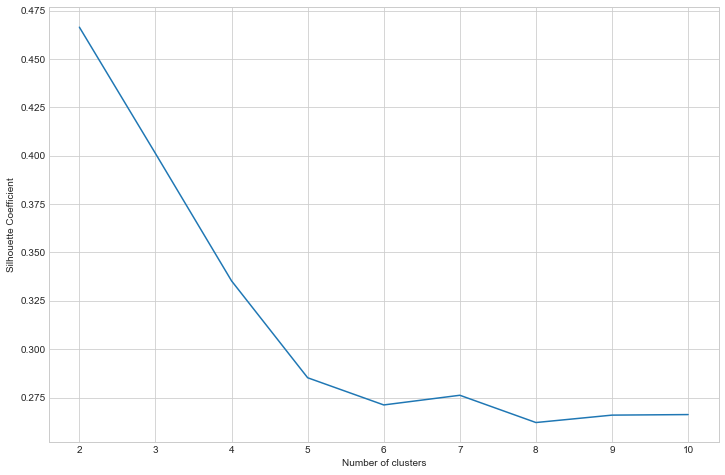

In [95]:
plt.figure(figsize=(12,8))
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Insights

From SC Score, the number of optimal clusters could be 3 or 4

In [96]:
Sil_width = silhouette_samples(df_scaled,labels_1)

In [97]:
kmeans1_dataset['Sil_width'] = Sil_width

In [98]:
kmeans1_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_means_1,Sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,KMeans(n_clusters=6),0.450321
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,KMeans(n_clusters=6),0.042987
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,KMeans(n_clusters=6),0.456130
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,KMeans(n_clusters=6),0.535576
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,KMeans(n_clusters=6),0.094511


In [99]:
silhouette_samples(df_scaled,labels_1).min()

-0.06687035371860134

## 3 Cluster Solution

In [100]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [101]:
#fitting the Kmeans 
km_3.fit(df_scaled)
km_3.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [102]:
#proportion of labels classified
pd.Series(km_3.labels_).value_counts()

1    72
0    71
2    67
dtype: int64

## K-Means Clustering & Cluster Information

In [103]:
kmeans1_dataset=df.copy()

In [104]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0


In [105]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [106]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [107]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


4-Cluster Solution

In [108]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [109]:
#fitting the Kmeans 
km_4.fit(df_scaled)
km_4.labels_

array([0, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 2, 1, 0, 3, 1, 3, 1, 3, 1, 1, 1,
       0, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 3, 2, 0,
       1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 3, 1, 1, 2, 3, 0,
       0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 3, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 2,
       2, 1, 3, 0, 3, 1, 3, 0, 0, 2, 1, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 0,
       2, 3, 0, 1, 1, 2, 3, 2, 1, 0, 3, 1, 1, 1, 3, 3, 0, 1, 3, 3, 1, 3,
       3, 0, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2,
       3, 3, 3, 1, 3, 0, 0, 1, 0, 2, 0, 1, 2, 3, 3, 1, 3, 1, 3, 0, 0, 0,
       3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 0, 3, 2, 0, 1,
       0, 1, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2])

In [110]:
#proportion of labels classified
pd.Series(km_4.labels_).value_counts()

3    65
1    64
0    51
2    30
dtype: int64

## K-Means Clustering & Cluster Information

In [111]:
kmeans14_dataset= df.copy()

In [112]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_scaled)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
kmeans14_dataset['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(kmeans14_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,19.1,16.4,0.9,6.3,3.8,3.5,6.1
2,11.9,13.3,0.8,5.2,2.8,4.9,5.1
3,16.1,15.2,0.9,5.8,3.4,4.0,5.6
4,14.1,14.1,0.9,5.4,3.2,2.4,5.0


In [113]:
ClusterPercentage(kmeans14_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,51,24.29
2,68,32.38
3,30,14.29
4,61,29.05


In [114]:
#transposing the cluster
cluster_4_T = kmeans_mean_cluster.T
cluster_4_T

cluster,1,2,3,4
spending,19.1,11.9,16.1,14.1
advance_payments,16.4,13.3,15.2,14.1
probability_of_full_payment,0.9,0.8,0.9,0.9
current_balance,6.3,5.2,5.8,5.4
credit_limit,3.8,2.8,3.4,3.2
min_payment_amt,3.5,4.9,4.0,2.4
max_spent_in_single_shopping,6.1,5.1,5.6,5.0


## 5 cluster

In [115]:
km_5 = KMeans(n_clusters=5,random_state=123)

In [116]:
#fitting the Kmeans 
km_5.fit(df_scaled)
km_5.labels_

array([1, 0, 1, 4, 1, 2, 4, 0, 1, 4, 1, 0, 4, 1, 0, 2, 0, 2, 2, 4, 2, 4,
       1, 4, 0, 3, 0, 4, 4, 2, 0, 4, 2, 0, 4, 4, 2, 2, 4, 1, 1, 0, 3, 1,
       4, 2, 0, 1, 1, 1, 4, 1, 1, 1, 1, 3, 2, 4, 4, 1, 0, 2, 4, 3, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 4, 3, 0, 0, 0, 0, 1, 4, 3, 3, 3,
       3, 2, 2, 1, 0, 4, 2, 1, 1, 3, 4, 3, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       3, 0, 1, 2, 4, 3, 0, 2, 4, 1, 0, 4, 2, 4, 0, 0, 1, 4, 0, 0, 4, 0,
       2, 1, 4, 3, 1, 2, 3, 0, 3, 0, 4, 2, 0, 2, 1, 4, 0, 4, 0, 2, 0, 3,
       2, 0, 2, 4, 0, 3, 1, 2, 1, 3, 1, 2, 3, 0, 0, 4, 0, 4, 0, 1, 1, 1,
       0, 4, 3, 2, 0, 0, 0, 0, 3, 3, 4, 3, 0, 4, 2, 0, 4, 1, 0, 3, 1, 2,
       1, 4, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3])

In [117]:
#proportion of labels classified
pd.Series(km_5.labels_).value_counts()

0    56
1    48
4    40
2    37
3    29
dtype: int64

## K-Means Clustering & Cluster Information

In [118]:
kmeans15_dataset= df.copy()

In [119]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_scaled)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
kmeans15_dataset['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(kmeans15_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.3,14.3,0.9,5.5,3.3,2.4,5.1
2,11.7,13.2,0.8,5.3,2.8,4.5,5.2
3,16.4,15.3,0.9,5.9,3.4,3.9,5.7
4,19.2,16.5,0.9,6.3,3.8,3.5,6.1
5,12.3,13.3,0.9,5.2,3.0,5.0,5.0


In [120]:
ClusterPercentage(kmeans15_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,56,26.67
2,42,20.00
3,29,13.81
4,48,22.86
5,35,16.67


In [121]:
#transposing the cluster
cluster_5_T = kmeans_mean_cluster.T
cluster_5_T

cluster,1,2,3,4,5
spending,14.3,11.7,16.4,19.2,12.3
advance_payments,14.3,13.2,15.3,16.5,13.3
probability_of_full_payment,0.9,0.8,0.9,0.9,0.9
current_balance,5.5,5.3,5.9,6.3,5.2
credit_limit,3.3,2.8,3.4,3.8,3.0
min_payment_amt,2.4,4.5,3.9,3.5,5.0
max_spent_in_single_shopping,5.1,5.2,5.7,6.1,5.0


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Q 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters?

## 3 group cluster via Kmeans

In [122]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


## 3 group cluster via hierarchical clustering

In [123]:
aggdata_w.T

clusters_maxclust_1,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
clusters_distclust_2,1.106667,2.000000,1.953846
Freq,75.000000,70.000000,65.000000


### x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x.x

## Problem 2: CART-RF-ANN

-An Insurance firm providing tour insurance is facing higher claim frequency. 

-The management decides to collect data from the past few years. 

-You are assigned the task to make a model which predicts the claim status and provide recommendations to management. 

-Use CART, RF & ANN and compare the models' performances in train and test sets.

## Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

In [124]:
Insurance = pd.read_csv('insurance_part2_data.csv')

## Inspect the data

In [125]:
Insurance.head(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [126]:
Insurance.tail(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [127]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [128]:
Insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Aggency_code,Type,Claimed,Channel,Product Name and Destination variable has numeric data but data type is object. It appears some special character is present in this variable.
Also there are  no missing values in variables.

## EDA

In [129]:
Insurance.shape

(3000, 10)

## Converting Object data type into Categorical

In [130]:
for column in Insurance[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    if Insurance[column].dtype == 'object':
        Insurance[column] = pd.Categorical(Insurance[column]).codes

In [131]:
Insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [132]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [133]:
Insurance.mean()

Age             38.091000
Agency_Code      1.306333
Type             0.612333
Claimed          0.308000
Commision       14.529203
Channel          0.984667
Duration        70.001333
Sales           60.249913
Product Name     1.661667
Destination      0.250000
dtype: float64

In [134]:
Insurance.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Agency_Code,3000.0,1.306333,0.994060,0.0,0.0,2.00,2.000,3.00
Type,3000.0,0.612333,0.487299,0.0,0.0,1.00,1.000,1.00
Claimed,3000.0,0.308000,0.461744,0.0,0.0,0.00,1.000,1.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000.0,0.984667,0.122895,0.0,1.0,1.00,1.000,1.00
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00
Product Name,3000.0,1.661667,1.258726,0.0,1.0,2.00,2.000,4.00
Destination,3000.0,0.250000,0.575277,0.0,0.0,0.00,0.000,2.00


In [135]:
# Are there any duplicates ?
dups = Insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Insurance[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,0,0,1,15.0,1,27,60.0,0,0
329,36,2,1,0,0.0,1,5,20.0,2,0
407,36,2,1,0,0.0,1,11,19.0,1,0
411,35,2,1,0,0.0,1,2,20.0,2,0
422,36,2,1,0,0.0,1,5,20.0,2,0
...,...,...,...,...,...,...,...,...,...,...
2940,36,2,1,0,0.0,1,8,10.0,1,0
2947,36,2,1,0,0.0,1,10,28.0,2,0
2952,36,2,1,0,0.0,1,2,10.0,1,0
2962,36,2,1,0,0.0,1,4,20.0,2,0


## Replace duplicate with mean value

In [136]:
Insurance.drop_duplicates(subset=None, keep= 'first', inplace=True)

## Q 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

## Univariate analysis

## Checking for the Otutlier

<AxesSubplot:>

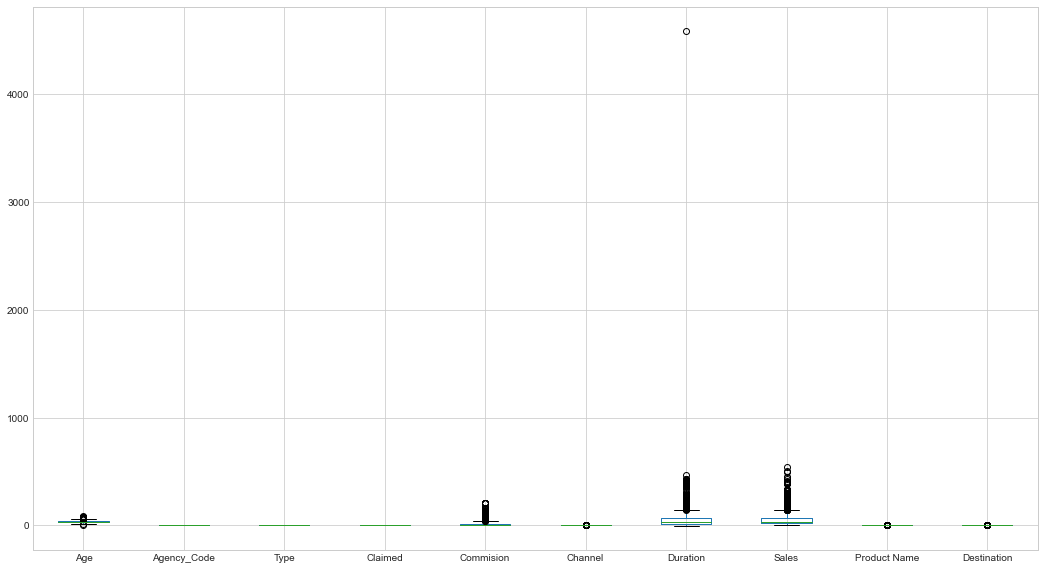

In [137]:
Insurance.boxplot(figsize=(18,10))

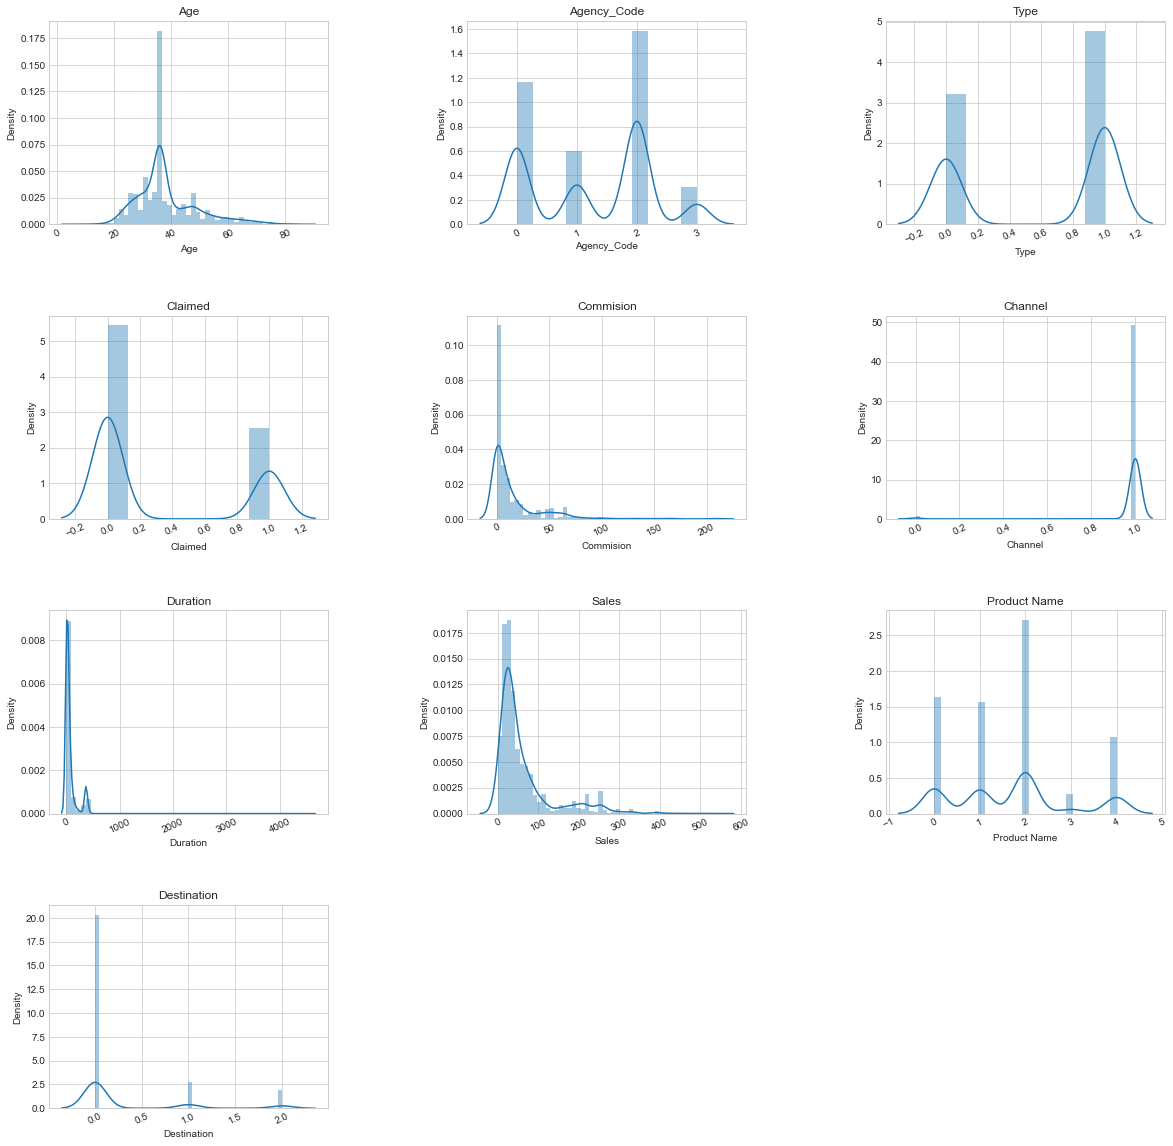

In [138]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(Insurance.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if Insurance.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=Insurance)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(Insurance[column])
            plt.xticks(rotation=25)
    
plot_distribution(Insurance, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

Very small number of outliers are present, which is also not significant as it will not affect much on ANN Predictions

## Lets Try the Multivariate analysis

Checking pairwise distribution of the continuous variables

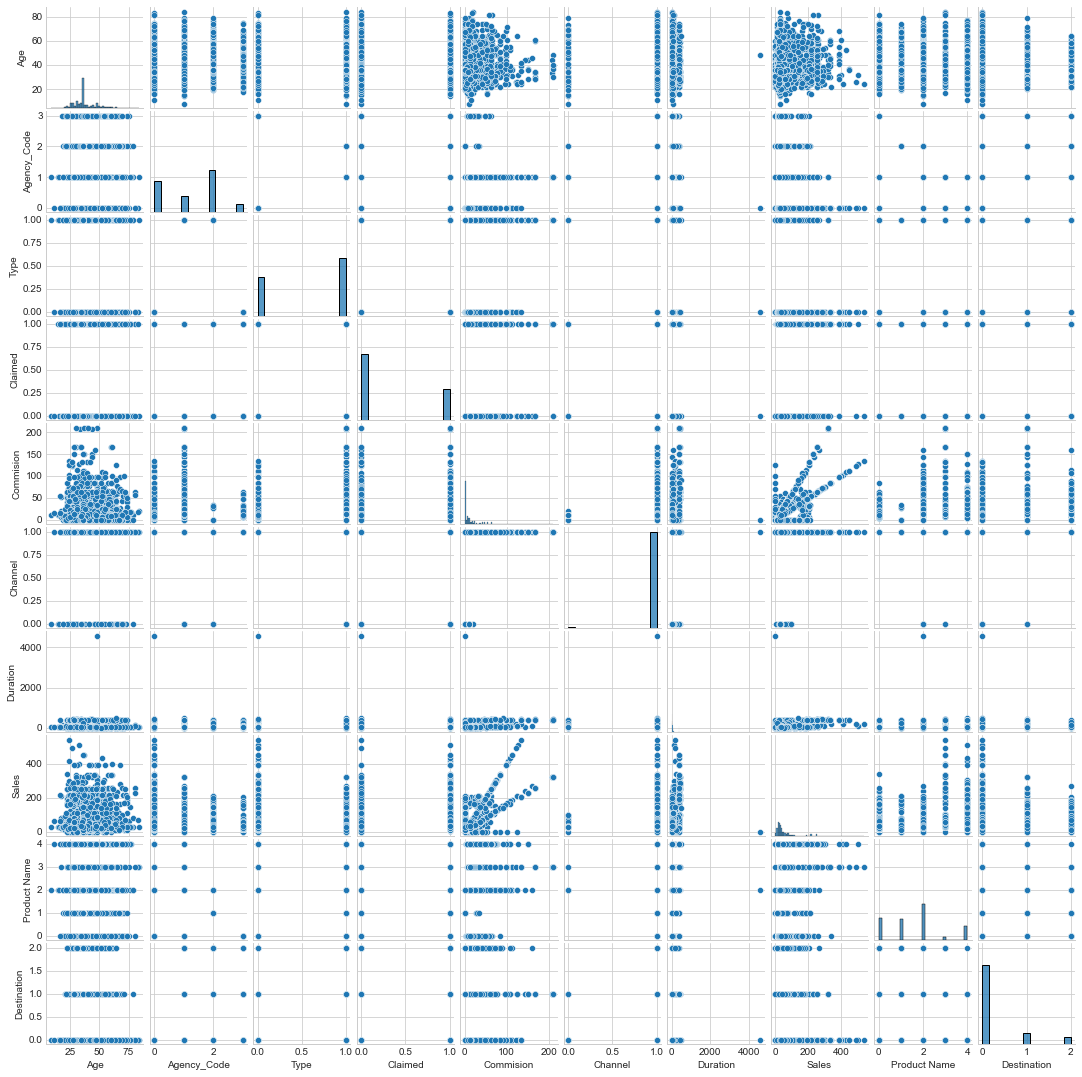

In [139]:
g= sns.pairplot(Insurance[['Age','Agency_Code','Type','Claimed','Commision','Channel','Duration','Sales','Product Name','Destination']])
g.fig.set_size_inches(15,15)

## Checking for Correlations

<AxesSubplot:>

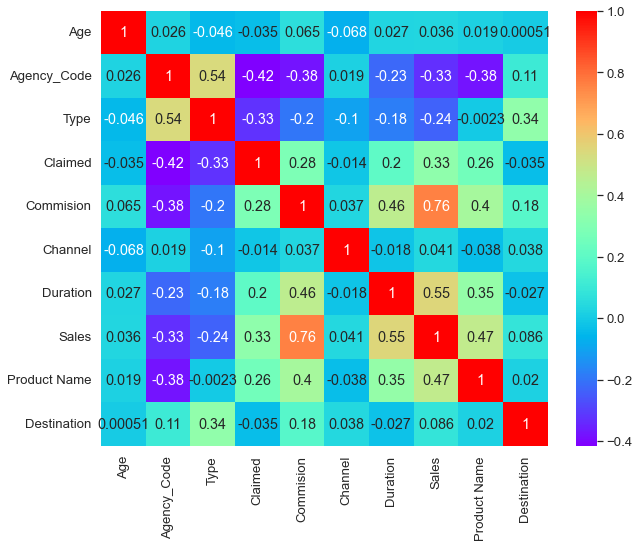

In [140]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(Insurance[['Age','Agency_Code','Type','Claimed','Commision','Channel','Duration','Sales','Product Name','Destination']].corr(),cmap='rainbow',annot=True)

There is hardly any correlation between the variables

## Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier

Capture the target column into separate vectors for training set and test set

In [142]:
X = Insurance.drop(["Claimed"], axis=1)

y = Insurance.pop("Claimed")

Splitting data into training and test set

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

lets Check Train Data Set

In [144]:
train_labels.value_counts()

0    1359
1     643
Name: Claimed, dtype: int64

In [145]:
train_labels.value_counts(normalize=True)

0    0.678821
1    0.321179
Name: Claimed, dtype: float64

lets Check Test Data Set

In [146]:
test_labels.value_counts()

0    588
1    271
Name: Claimed, dtype: int64

In [147]:
test_labels.value_counts(normalize=True)

0    0.684517
1    0.315483
Name: Claimed, dtype: float64

## Observations
Train label and Test label are almost equally distributed between the train and test sets w.r.t target classes

## Declaring Decison Tree Classifier as dt_model

In [148]:
dt_model = DecisionTreeClassifier(criterion='gini')

In [149]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

## Tree Sub Moduel(Exo Graphical function)

In [150]:
from sklearn import tree

In [151]:
train_char_label = ['No','Yes']

In [152]:
Insurance_Tree_File = open('d:Insurance_Tree.dot','w')

In [153]:
dot_data= tree.export_graphviz(dt_model,out_file= Insurance_Tree_File, feature_names= list(X_train),class_names= (train_char_label))

## Regularising the decision tree

In [154]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 10, min_samples_split = 30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [155]:
Insurance_Tree_regularized= open('d:Insurance_Tree_regularized.dot','w')

In [156]:
Insurance_Tree_regularized.close()

In [157]:
reg_dt_model.feature_importances_

array([0.04689169, 0.44752048, 0.        , 0.0567294 , 0.00842256,
       0.11754766, 0.27152791, 0.03529531, 0.01606498])

In [158]:
print(pd.DataFrame(dt_model.feature_importances_,columns= ["Imp"], index= X_train.columns))

                   Imp
Age           0.190523
Agency_Code   0.170606
Type          0.000000
Commision     0.072677
Channel       0.003908
Duration      0.275793
Sales         0.223744
Product Name  0.033709
Destination   0.029040


## Predict Model

In [159]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict  = reg_dt_model.predict(X_test)

## Probability in Prediction Model

Train Labels

In [160]:
ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [161]:
ytrain_predict_prob= reg_dt_model.predict_proba(X_train)
ytrain_predict_prob

array([[0.95238095, 0.04761905],
       [0.58196721, 0.41803279],
       [0.81818182, 0.18181818],
       ...,
       [0.93548387, 0.06451613],
       [0.92592593, 0.07407407],
       [0.58333333, 0.41666667]])

In [162]:
 pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.952381,0.047619
1,0.581967,0.418033
2,0.818182,0.181818
3,0.346405,0.653595
4,0.952381,0.047619


Test Labels

In [163]:
ytest_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [164]:
ytest_predict_prob= reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.21052632, 0.78947368],
       [0.99090909, 0.00909091],
       [0.81818182, 0.18181818],
       ...,
       [0.48717949, 0.51282051],
       [0.92810458, 0.07189542],
       [0.5       , 0.5       ]])

In [165]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.210526,0.789474
1,0.990909,0.009091
2,0.818182,0.181818
3,1.000000,0.000000
4,0.615385,0.384615


## Measuring AUC-ROC Curve

Train Labels AUC And ROC Curve

AUC: 0.857


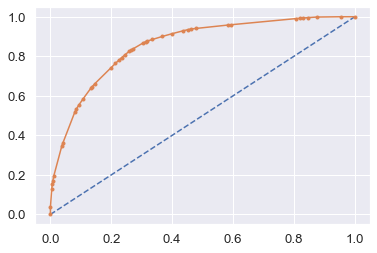

In [166]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
#calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## AUC & ROC for the Test Labels data

AUC: 0.788


<function matplotlib.pyplot.show(close=None, block=None)>

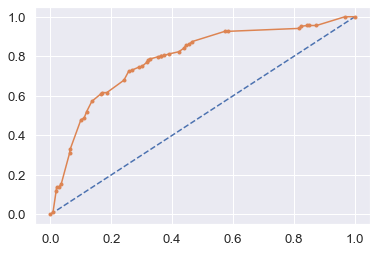

In [167]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels,probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0,1],[0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show

## Confusion Matrix for train data

In [168]:
from sklearn.metrics import confusion_matrix,classification_report

In [169]:
confusion_matrix(train_labels, ytrain_predict)

array([[1213,  146],
       [ 267,  376]], dtype=int64)

In [170]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.7937062937062938

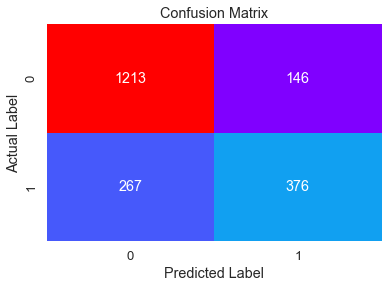

In [171]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Getting classification report for train labels

In [172]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.58      0.65       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



## Confusion Matrix for test data

In [173]:
confusion_matrix(test_labels, ytest_predict)

array([[508,  80],
       [116, 155]], dtype=int64)

In [174]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7937062937062938

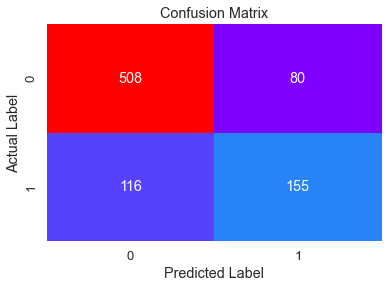

In [175]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Getting classification report for test labels

In [176]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       588
           1       0.66      0.57      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



## Rendom Forest

## Build random forest classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rfcl= RandomForestClassifier(n_estimators=501, oob_score= True, max_depth=10, max_features=5, min_samples_leaf= 50, min_samples_split=150,)

In [179]:
# fit data in rfcl
rfcl= rfcl.fit(X_train, train_labels)

In [180]:
# Getting out of bag Score(OOB Score)
rfcl.oob_score_

0.7592407592407593

In [181]:
# Grid search cross validation(IT Passes Multiple value for max depth and estimator)
from sklearn.model_selection import GridSearchCV

In [182]:
Param_grid = {'max_depth':[7,10],'max_features':[4,6],'min_samples_leaf':[50,100],'min_samples_split':[150,300],'n_estimators':[301,501]}

In [183]:
rfcl = RandomForestClassifier()

In [184]:
grid_search= GridSearchCV(estimator=rfcl,param_grid= Param_grid,cv=3)

In [185]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [186]:
## Grid to get best parameter option
grid_search.best_params_
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=301)

In [187]:
best_grid = grid_search.best_estimator_

In [188]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Creating Confusion Matrix in Random Forest

In [189]:
from sklearn.metrics import confusion_matrix,classification_report

Confusion Matrix for Train Labels in Random Forest

In [190]:
confusion_matrix(train_labels, ytrain_predict)

array([[1210,  149],
       [ 311,  332]], dtype=int64)

In [191]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7937062937062938

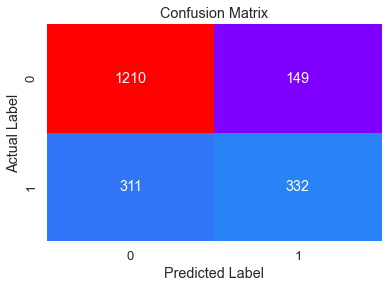

In [192]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [193]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.69      0.52      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.72      2002
weighted avg       0.76      0.77      0.76      2002



Confusion Matrix for Test Labels in Random Forest

In [194]:
confusion_matrix(test_labels, ytest_predict)

array([[528,  60],
       [133, 138]], dtype=int64)

In [195]:
#Train Data Accuracy
reg_dt_model.score(X_test,test_labels) 

0.7718277066356228

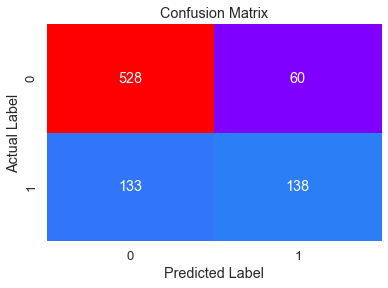

In [196]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [197]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.70      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.76       859



## Roc Curve Auc Curve

Roc and Auc curve for Train Labels

In [198]:
import matplotlib.pyplot as plt

In [199]:
probs = best_grid.predict_proba(X_train)

In [200]:
Probs = probs[:,1]

In [201]:
from sklearn.metrics import roc_auc_score

In [202]:
auc = roc_auc_score(train_labels,Probs)
auc

0.8170614199215643

AUC: 0.817


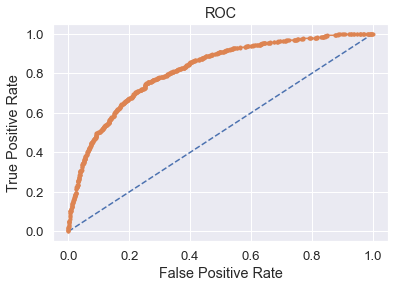

In [203]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels,Probs)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [204]:
probs = best_grid.predict_proba(X_test)
Probs = probs[:,1]

In [205]:
from sklearn.metrics import roc_auc_score

In [206]:
auc = roc_auc_score(test_labels,Probs)
auc

0.8199883274342947

AUC: 0.820


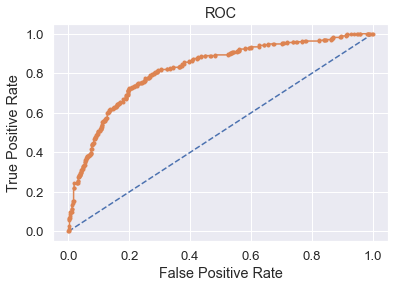

In [207]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels,Probs)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Artificial Neural Network

Scaling Method

In [208]:
from sklearn.preprocessing import StandardScaler 

In [209]:
sc = StandardScaler()

In [210]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [211]:
param_grid= {'hidden_layer_sizes':[500],'activation':['relu'],'solver':['sgd','adam'],'tol':[0.0001],'max_iter':[1000]}

In [212]:
from sklearn.neural_network import MLPClassifier

In [213]:
MLP = MLPClassifier()

In [214]:
grid_search = GridSearchCV(estimator = MLP,param_grid = param_grid,cv=3)

In [215]:
cfl= grid_search.fit(X_train,train_labels)

In [216]:
grid_search.best_params_
grid_search.best_estimator_

MLPClassifier(hidden_layer_sizes=500, max_iter=1000)

In [217]:
best_grid = grid_search.best_estimator_

In [218]:
ytrain_predicts= best_grid.predict(X_train)

In [219]:
ytest_predicts= best_grid.predict(X_test)

In [220]:
ytrain_predictscore = best_grid.predict_proba(X_train)
ytest_predictscore = best_grid.predict_proba(X_test)

In [221]:
ytrain_predictscore[:,1]

array([0.31946443, 0.18990828, 0.23653891, ..., 0.06592242, 0.2880844 ,
       0.46638015])

In [222]:
ytest_predictscore[:,1]

array([0.48618019, 0.07508679, 0.6391896 , 0.18679527, 0.21933902,
       0.24236048, 0.09961332, 0.64699539, 0.13756622, 0.28768407,
       0.25915642, 0.73655199, 0.53977569, 0.26043199, 0.07714687,
       0.06681035, 0.37008188, 0.26558479, 0.56593027, 0.37582861,
       0.43740651, 0.60536444, 0.12454257, 0.21235506, 0.17466228,
       0.18025088, 0.6508325 , 0.08285789, 0.34572173, 0.24810769,
       0.65175128, 0.20254263, 0.60600651, 0.48769172, 0.17006195,
       0.31037939, 0.14368897, 0.4100652 , 0.45723614, 0.16032983,
       0.09548636, 0.31259501, 0.07945896, 0.06563444, 0.0879977 ,
       0.14676381, 0.08171475, 0.07332965, 0.42664103, 0.11896147,
       0.13252267, 0.43625338, 0.08247436, 0.09033125, 0.59104503,
       0.497337  , 0.07397142, 0.54582326, 0.46188269, 0.10230698,
       0.06554587, 0.54801649, 0.35134171, 0.54615847, 0.20107694,
       0.24848135, 0.3455004 , 0.58804893, 0.2268654 , 0.32203939,
       0.58232784, 0.07263242, 0.17995727, 0.21601437, 0.09063

In [223]:
from sklearn.metrics import confusion_matrix,classification_report

ROC AND AUC for Train Label in Artifical Neural Network

AUC: 0.820


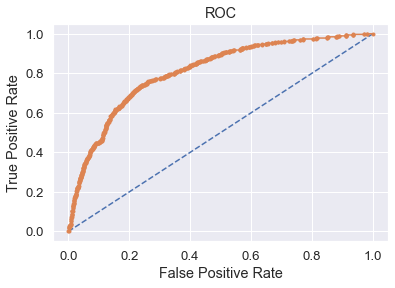

In [224]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels,ytrain_predictscore[:,1])
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

ROC AND AUC for Test Label in Artifical Neural Network

AUC: 0.820


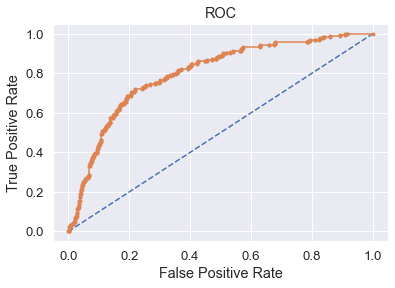

In [225]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels,ytest_predictscore[:,1])
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
print('AUC: %.3f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Confusion Matrix for Train Labels in Artifical Nueral Network

In [226]:
confusion_matrix(train_labels, ytrain_predicts)

array([[1199,  160],
       [ 321,  322]], dtype=int64)

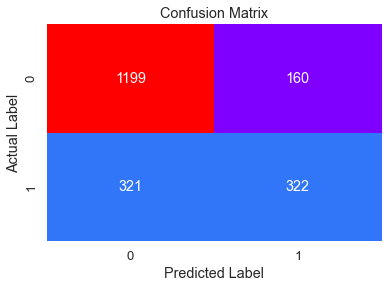

In [227]:
# Get the Confusion Matrix on the train data
confusion_matrix(train_labels, ytrain_predicts)
sns.heatmap(confusion_matrix(train_labels, ytrain_predicts),annot = True, fmt='d', cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [228]:
print(classification_report(train_labels,ytrain_predicts))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1359
           1       0.67      0.50      0.57       643

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.70      2002
weighted avg       0.75      0.76      0.75      2002



Confusion Matrix for Train Labels in Artifical Nueral Forest

In [229]:
confusion_matrix(test_labels, ytest_predict)

array([[528,  60],
       [133, 138]], dtype=int64)

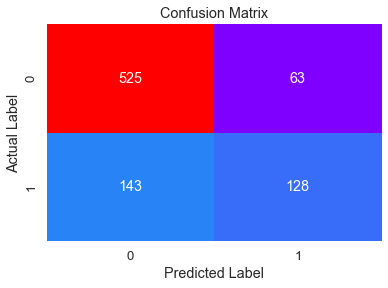

In [230]:
# Get the Confusion Matrix on the train data
confusion_matrix(test_labels, ytest_predicts)
sns.heatmap(confusion_matrix(test_labels, ytest_predicts),annot = True, fmt='d', cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [231]:
print(classification_report(test_labels,ytest_predicts))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       588
           1       0.67      0.47      0.55       271

    accuracy                           0.76       859
   macro avg       0.73      0.68      0.70       859
weighted avg       0.75      0.76      0.75       859



## Comparison of the performance metrics from the 3 models

In [232]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

NameError: name 'cart_train_acc' is not defined

## ROC Curve for the 3 models on the Training data¶

NameError: name 'cart_train_fpr' is not defined

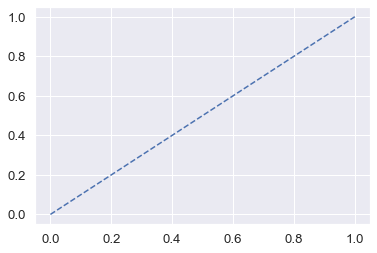

In [233]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

NameError: name 'cart_test_fpr' is not defined

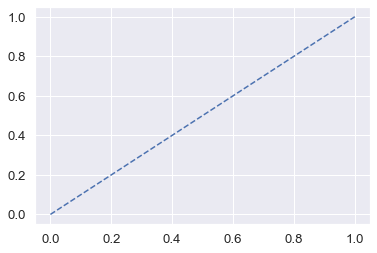

In [234]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')